<a href="https://colab.research.google.com/github/zhuoyingcai/NYC-Housing-Prices-Analysis/blob/master/NYC_Housing_Prices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Section

In [0]:
import os

# Data
import numpy as np
import pandas as pd

# Plot
import seaborn as sns
import matplotlib.pyplot as plt


# Path Functions

In [0]:
def ensure_dir(path_to_dir):
  try:
      os.makedirs(path_to_dir)
  except FileExistsError:
      # directory already exists
      pass

# Config

In [3]:
# path config
annualizedSalesUpdate_data_dir = '/content/drive/My Drive/Colab Notebooks/dataScience/annualizedSalesUpdate'
data_dir = '/content/drive/My Drive/Colab Notebooks/dataScience/data'

# mount google drive
from google.colab import drive
drive.mount('/content/drive')

# make sure dir exist
ensure_dir(data_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Load and summarize data

In [0]:
# define dataframe
df = pd.DataFrame()

In [0]:
years = [2017, 2018]
boroughs = ['bronx', 'brooklyn', 'manhattan', 'queens', 'statenisland']

# load data
for year in years:
  for borough in boroughs:
    path = annualizedSalesUpdate_data_dir + '/%s_%s.xls' % (year, borough)
    data = pd.read_excel(path, header=4)
    df = df.append(data, sort=False)

We first visually inspect the data to see if there is any missing data or incorrect data types. Also, we may want to edit data entry.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170407 entries, 0 to 8385
Data columns (total 21 columns):
BOROUGH                           170407 non-null int64
NEIGHBORHOOD                      170407 non-null object
BUILDING CLASS CATEGORY           170407 non-null object
TAX CLASS AT PRESENT              170349 non-null object
BLOCK                             170407 non-null int64
LOT                               170407 non-null int64
EASE-MENT                         88660 non-null object
BUILDING CLASS AT PRESENT         170349 non-null object
ADDRESS                           170407 non-null object
APARTMENT NUMBER                  106536 non-null object
ZIP CODE                          170393 non-null float64
RESIDENTIAL UNITS                 170349 non-null float64
COMMERCIAL UNITS                  170349 non-null float64
TOTAL UNITS                       170349 non-null float64
LAND SQUARE FEET                  170346 non-null float64
GROSS SQUARE FEET                 1

In [7]:
df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,25,,A5,412 EAST 179 STREET,,...,1.0,0.0,1.0,1842.0,2048.0,1901.0,1,A5,0,2017-04-04
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,55,,A5,410 EAST 182ND STREET,,...,1.0,0.0,1.0,1330.0,1460.0,1899.0,1,A5,305000,2017-07-18
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,56,,A1,412 EAST 182 STREET,,...,1.0,0.0,1.0,1306.0,1440.0,1899.0,1,A1,178000,2017-01-19
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,56,,A1,412 EAST 182 STREET,,...,1.0,0.0,1.0,1306.0,1440.0,1899.0,1,A1,449000,2017-07-14
4,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,65,,A1,4455 PARK AVENUE,,...,1.0,0.0,1.0,1622.0,1587.0,1899.0,1,A1,140000,2017-05-12
5,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,70,,A1,4445 PARK AVENUE,,...,1.0,0.0,1.0,1694.0,1497.0,1899.0,1,A1,246000,2017-11-06
6,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3036,13,,A1,4348 PARK AVENUE,,...,1.0,0.0,1.0,3525.0,1764.0,1899.0,1,A1,420000,2017-02-03
7,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3037,42,,A1,4428 PARK AVENUE,,...,1.0,0.0,1.0,3525.0,1340.0,1899.0,1,A1,380250,2017-09-29
8,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3037,101,,S0,443 EAST 180 STREET,,...,1.0,2.0,3.0,1293.0,2820.0,1952.0,1,S0,325000,2017-11-13
9,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3043,55,,A1,1948 BATHGATE AVENUE,,...,1.0,0.0,1.0,2356.0,2047.0,1901.0,1,A1,127000,2017-08-22


In [8]:
df.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
8381,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7094,61,NaN,V0,23 WILTSHIRE LANE,NaN,...,0.0,0.0,0.0,4427.0,0.0,2018.0,1,V0,793216,2018-05-25
8382,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7267,289,NaN,A5,41 JADE COURT,NaN,...,1.0,0.0,1.0,2955.0,2612.0,2018.0,1,V0,671026,2018-10-04
8383,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7267,298,NaN,A5,11 JADE COURT,NaN,...,1.0,0.0,1.0,4108.0,2612.0,2018.0,1,V0,610950,2018-07-23
8384,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1,7267,299,NaN,A5,9 JADE COURT,NaN,...,1.0,0.0,1.0,11019.0,2612.0,2018.0,1,V0,672043,2018-08-07
8385,5,WOODROW,05 TAX CLASS 1 VACANT LAND,1B,7346,1,NaN,V0,GAYNOR STREET,NaN,...,0.0,0.0,0.0,42016.0,0.0,0.0,1,V0,0,2018-09-21


# 2. Data Cleaning

---

We found two problems:

 1. we see that the dataframe has 170407 entries, but TAX CLASS AT PRESENT, EASE-MENT, BUILDING CLASS AT PRESENT, APARTMENT NUMBER, ZIP CODE, RESIDENTIAL UNITS, COMMERCIAL UNITS, TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET and YEAR BUILT has less entries.
 
 2. The BROUGH is represented as numerical values rather than categorical.
 
 3. There are some data does not make sense, such as GROSS SQUARE FEET, YEAR BUILT and SALE PRICE can not be 0.


---


 What we are going to do next:
 
 1. rename BOROUGH values to actual borough name.
 
 2. drop columns that we are not going to use.
 
 3. remove raws with 0 SALE PRICE, GROSS SQUARE FEET, LAND SQUARE FEET and YEAR BUILT.

In [0]:
df['BOROUGH'] = df['BOROUGH'].replace({1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'})

In [0]:
df = df.drop(['BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS',
         'APARTMENT NUMBER', 'ZIP CODE', 'BUILDING CLASS AT TIME OF SALE' ], axis=1)

In [0]:
df = df[df['SALE PRICE'] != 0]
df = df[df['GROSS SQUARE FEET'] != 0]
df = df[df['LAND SQUARE FEET'] != 0]
df = df[df['YEAR BUILT'] != 0]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64388 entries, 1 to 8384
Data columns (total 13 columns):
BOROUGH                      64388 non-null object
NEIGHBORHOOD                 64388 non-null object
BLOCK                        64388 non-null int64
LOT                          64388 non-null int64
RESIDENTIAL UNITS            64346 non-null float64
COMMERCIAL UNITS             64346 non-null float64
TOTAL UNITS                  64346 non-null float64
LAND SQUARE FEET             64345 non-null float64
GROSS SQUARE FEET            64346 non-null float64
YEAR BUILT                   64378 non-null float64
TAX CLASS AT TIME OF SALE    64388 non-null int64
SALE PRICE                   64388 non-null int64
SALE DATE                    64388 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(4), object(2)
memory usage: 6.9+ MB


## 2.1 Outlier
We also want to look at the distribution of our SALE PRICE.

1. We noticed that there are some extremely expensive house located in Manhattan, we would like to look at it and decide whether include them in our project or not.

2. The documentation of this data set explained there will be $0 sales price which means that there was a transfer of ownership without a cash consideration. However, there are some other values indicate there was a transfer of ownership which is not in the consideration of our project.

In [13]:
df['SALE PRICE'].value_counts(dropna=False).head(10)

10        1289
600000     643
550000     611
650000     609
700000     593
800000     568
450000     561
750000     541
400000     539
500000     528
Name: SALE PRICE, dtype: int64

In [14]:
df.nlargest(10, 'SALE PRICE')

,BOROUGH,NEIGHBORHOOD,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
773,Manhattan,CHELSEA,713,1,0.0,167.0,167.0,165200.0,1100533.0,1905.0,4,2397501899,2018-03-20
7347,Manhattan,MIDTOWN CBD,1301,1,0.0,35.0,35.0,81336.0,1586886.0,1966.0,4,2210000000,2017-05-05
2572,Manhattan,FINANCIAL,40,3,0.0,1.0,1.0,53632.0,1617206.0,1987.0,4,1040000000,2017-01-24
14970,Manhattan,UPPER WEST SIDE (59-79),1119,61,0.0,1.0,1.0,15059.0,99769.0,1978.0,4,980000000,2018-06-15
771,Manhattan,CHELSEA,673,1,0.0,42.0,42.0,136000.0,1129200.0,1912.0,4,880000000,2018-10-23
20902,Brooklyn,SPRING CREEK,4435,1,1092.0,0.0,1092.0,358496.0,997720.0,1971.0,2,869612895,2018-05-04
1755,Manhattan,FASHION,840,42,0.0,4.0,4.0,51271.0,697029.0,1920.0,4,850000000,2019-02-08
8602,Manhattan,MIDTOWN WEST,1000,1,0.0,4.0,4.0,16066.0,369864.0,1909.0,4,719099999,2018-04-27
6795,Manhattan,MIDTOWN CBD,1298,23,0.0,42.0,42.0,35145.0,627691.0,1987.0,4,701000000,2018-10-30
2570,Manhattan,FINANCIAL,29,1,0.0,1.0,1.0,42762.0,993569.0,1983.0,4,652000000,2017-05-24


In [15]:
lst = df['SALE PRICE'].unique().tolist()
lst = np.sort(lst, axis = None)
lst[:100]

array([    1,     2,     3,     4,     5,     6,    10,    15,    20,
          60,   100,   125,   200,   210,   396,   416,   500,   700,
         825,  1000,  1006,  1041,  1162,  1500,  1787,  1800,  1895,
        2000,  2352,  2416,  2500,  2567,  3000,  3317,  3500,  3582,
        3750,  3774,  3900,  3937,  4000,  4500,  4700,  4800,  4900,
        4997,  5000,  5041,  5100,  5200,  5300,  5500,  5700,  5750,
        6000,  6081,  6250,  6270,  6300,  6400,  6438,  6500,  6533,
        6562,  6650,  7000,  7500,  7923,  7980,  8000,  8250,  8500,
        9500,  9686,  9828, 10000, 10001, 10050, 10500, 11000, 11500,
       11666, 12000, 12497, 12500, 12678, 12950, 13333, 13864, 13870,
       14583, 14915, 15000, 15238, 15387, 15523, 15567, 16000, 16500,
       16544])

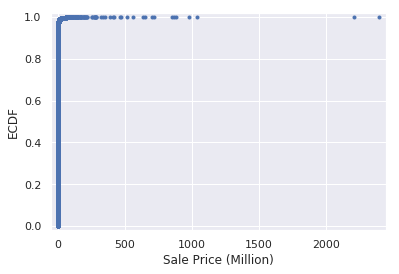

In [17]:
x = np.sort(df['SALE PRICE']/1000000)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Sale Price (Million)')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

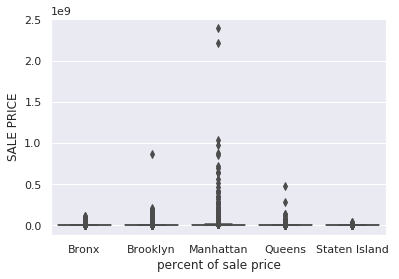

In [18]:
_ = sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
_ = plt.xlabel('Borough')
_ = plt.xlabel('percent of sale price')
plt.show()

## 2.2 Cut Unreal Price

From the above data, we conclude that:

1. We think the price of the most expensive buildings is reasonable. The average price for each units is not unacceptable. Hoever, We decided not to keep those data because those value is extremly large and way too far from the mean. We will set a maximum price range for the data.

2. There are a lot of extremely low sale price which indicates that there was a transfer of ownership. In order to solve this problem, we decided to set a minimum price range for the data.

---

We set price range from ten thousands up to three millions. Houses in this price is what we can accept and would like to purchase it.

In [0]:
# set max price to be 10000000
df = df[(df['SALE PRICE'] < 3000000)]
# set min price to be 50000
df = df[(df['SALE PRICE'] > 100000)]

# 3. Data Visualization

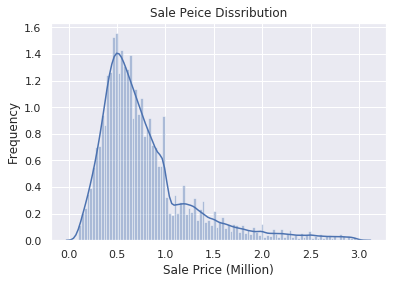

In [20]:
sns.set()
_ = sns.distplot(df['SALE PRICE']/1000000, bins=100)
plt.title('Sale Peice Dissribution')
plt.xlabel('Sale Price (Million)')
plt.ylabel('Frequency')
plt.show()

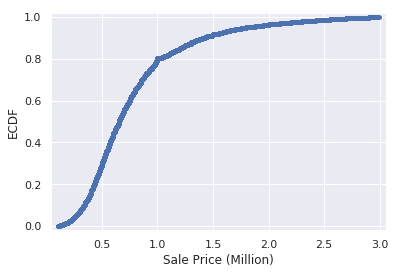

In [21]:
# make Empirical cumulative distribution function (ECDF)
x = np.sort(df['SALE PRICE']/1000000)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Sale Price (Million)')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

what to say?

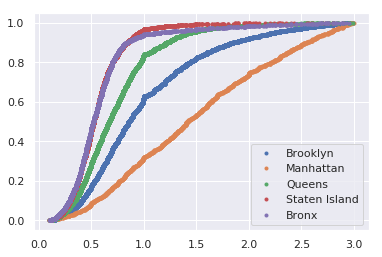

In [33]:
_ = df.set_index('BOROUGH', drop=False)
_Brooklyn = _brooklyn.loc['Brooklyn']
_Manhattan = _brooklyn.loc['Manhattan']
_Queens = _brooklyn.loc['Queens']
_StatenIsland = _brooklyn.loc['Staten Island']
_Bronx = _brooklyn.loc['Bronx']

x = np.sort(_Brooklyn['SALE PRICE']/1000000)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')

x = np.sort(_Manhattan['SALE PRICE']/1000000)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')

x = np.sort(_Queens['SALE PRICE']/1000000)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')

x = np.sort(_StatenIsland['SALE PRICE']/1000000)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')

x = np.sort(_Bronx['SALE PRICE']/1000000)
y = np.arange(1, len(x)+1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.legend(['Brooklyn','Manhattan','Queens','Staten Island','Bronx'])
plt.show()

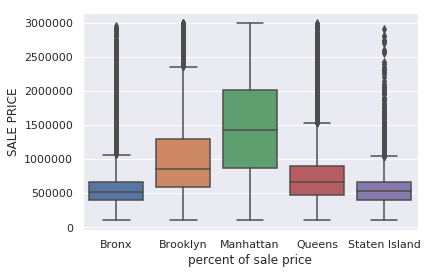

In [22]:
# shows the average price in each boroughs
_ = sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
_ = plt.xlabel('Borough')
_ = plt.xlabel('percent of sale price')
plt.show()

We can see the housing turnover rate from blow figure. Which are: Manhattan >> Brooklyn > Queens > Bronx >= Staten Island.